# Uppgift 1
## a, b)

In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import plotly_express as px

infection_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19.xlsx')
vaccine_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19_Vaccine.xlsx')

veckodata_riket = pd.read_excel(infection_statistics_xls, 'Veckodata Riket')

veckodata_riket['Vecka'] = [f'{year}v{week}' for year, week in zip(veckodata_riket.loc[:,'år'], veckodata_riket.loc[:,'veckonummer'])]
# Append a new column 'Vecka' with values of format 'YYYvWW' using pandas vectorisation and zip().
veckodata_riket.drop(['år', 'veckonummer'], axis=1, inplace=True) # Remove 2 columns that were merged.
veckodata_riket.head()

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


## c, d, e)

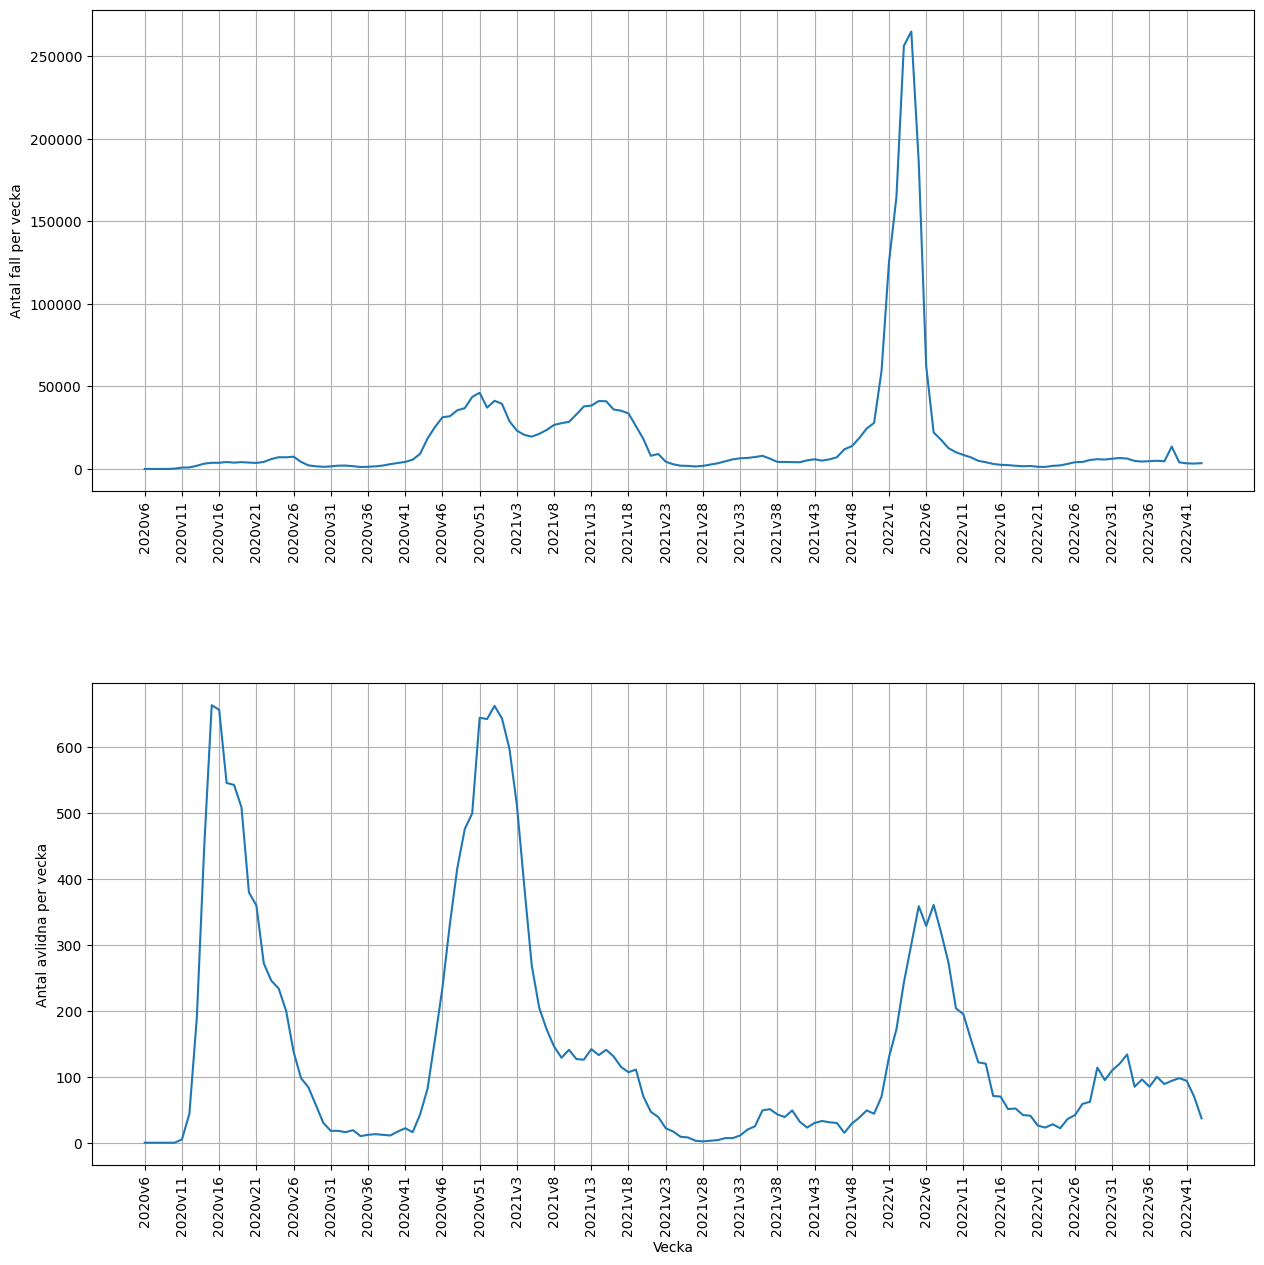

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(15,15)) # Using matplotlib's subplots class.
plt.subplots_adjust(hspace=0.4) # Set custom margin for better spacing.

sns.lineplot(veckodata_riket, x='Vecka', y='Antal_fall_vecka', ax=axes[0]) # Using seaborn to draw on the created subplots.
sns.lineplot(veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', ax=axes[1])

veckodata_xticks = veckodata_riket.index # Save the index values for later use.

axes[0].set_xticks(veckodata_xticks[::5], veckodata_riket['Vecka'][::5], rotation=90) # Only show every fifth week, so the x-axis labels won't be cluttered.
axes[0].set_xlabel('') # Remove x-label for first subplot.
axes[0].set_ylabel('Antal fall per vecka')
axes[1].set_xticks(veckodata_xticks[::5], veckodata_riket['Vecka'][::5], rotation=90)
axes[1].set_ylabel('Antal avlidna per vecka')
axes[0].grid() # Turn on grids so that it's easier to read corresponding x,y values.
axes[1].grid()
plt.show()

## f)

In [28]:
px.line(veckodata_riket, x='Vecka', y='Kum_antal_fall')

## Uppgift 2
# a, b, c, d)

In [4]:
vaccine_dataset = pd.read_excel(vaccine_statistics_xls, 'Vaccinerade kommun och ålder')
print(f'Antal län representerade i datasetet: {vaccine_dataset["Län_namn"].nunique()}') # Counts each unique value in "län_namn"

print(f'Antal kommun representerade i datasetet: {vaccine_dataset["Kommun_namn"].nunique()}')

print(f'Befolknings storlek i datasetet: {vaccine_dataset["Befolkning"].sum()}')

sum = vaccine_dataset.loc[vaccine_dataset['Ålder'].isin(['12-15','15-17']), 'Befolkning'].sum() # Summera 'Befolkning' kolumn om 'Ålder' är under 18.
print(f'Antal personer som är under 18 år: {sum}')

Antal län representerade i datasetet: 21
Antal kommun representerade i datasetet: 290
Befolknings storlek i datasetet: 9092790
Antal personer som är under 18 år: 503831


# e)

In [30]:
age_groups = vaccine_dataset.groupby('Ålder').sum(numeric_only=True).reset_index() # Group by age and sum populations, and then reset index so I can use 'Ålder' for the pie chart.
px.pie(age_groups, names='Ålder', values='Befolkning', title='Age distribution in Sweden')

# f)

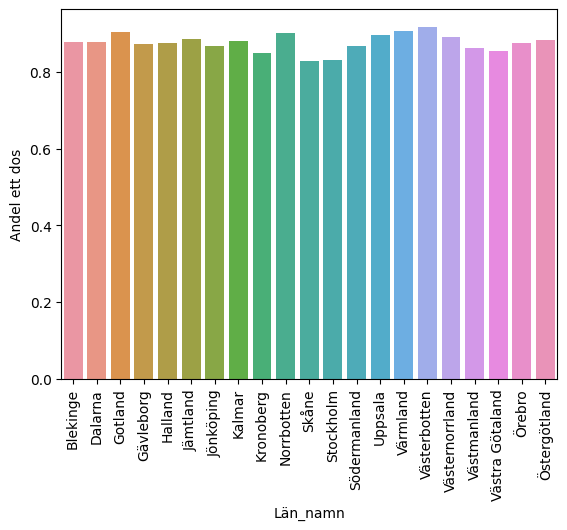

In [39]:
län_data = vaccine_dataset.groupby(['Län_namn']).sum(numeric_only=True).reset_index() # .sum() already excludes NaN values.
län_data.drop(['Län', 'Kommun', 'Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser', 'Andel 4 doser'], axis=1, inplace=True) # Removes uneccessary columns

# Using pandas vectorisation again to construct new columns.
befolkning = län_data['Befolkning']
län_data['Andel ett dos'] = län_data['Antal minst 1 dos']   / befolkning
län_data['Andel två dos'] = län_data['Antal minst 2 doser'] / befolkning
län_data['Andel tre dos'] = län_data['Antal 3 doser']       / befolkning
län_data['Andel fyra dos'] = län_data['Antal 4 doser']      / befolkning  

x_ticks = län_data.index
län_namn = [län[:-5] if län[-5] == 's' else län[:-4] for län in län_data['Län_namn']] # Ugly list comprehension to remove the 'län' in each name and trailing 's' letters.
län_data['Län_namn'] = län_namn # Change dataframe län namn to fixed names.

#https://stackoverflow.com/questions/45516770/how-do-i-omit-matplotlib-printed-output-in-python-jupyter-notebook
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
fig = sns.barplot(län_data, x='Län_namn', y='Andel ett dos')
fig.set_xticks(x_ticks, län_namn, rotation=90);
plt.savefig('AndelEttDos.png', bbox_inches='tight') 

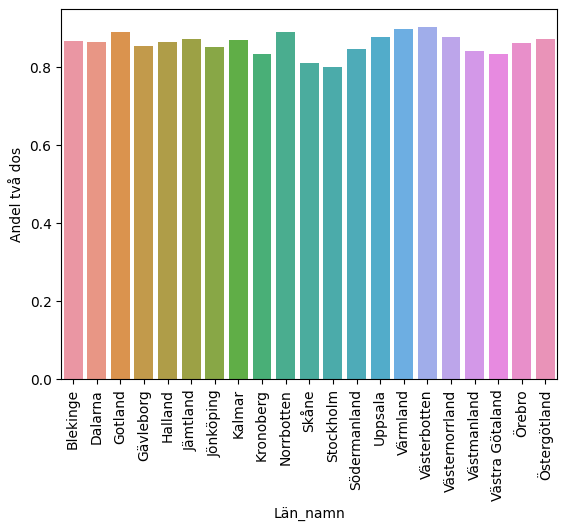

In [35]:
fig = sns.barplot(län_data, x='Län_namn', y='Andel två dos')
fig.set_xticks(x_ticks, län_namn, rotation=90);

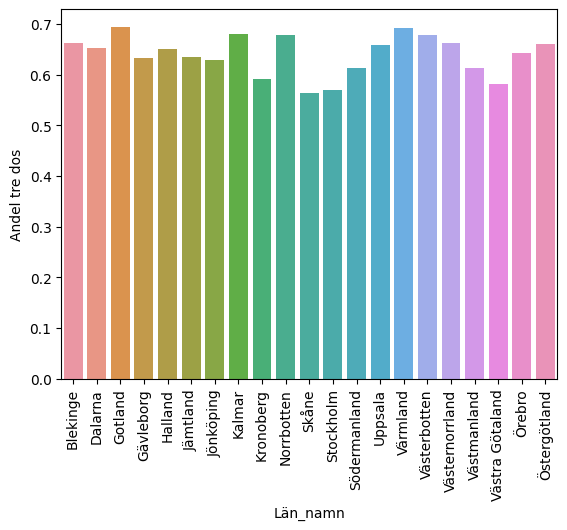

In [36]:
fig = sns.barplot(län_data, x='Län_namn', y='Andel tre dos')
fig.set_xticks(x_ticks, län_namn, rotation=90);

# g)

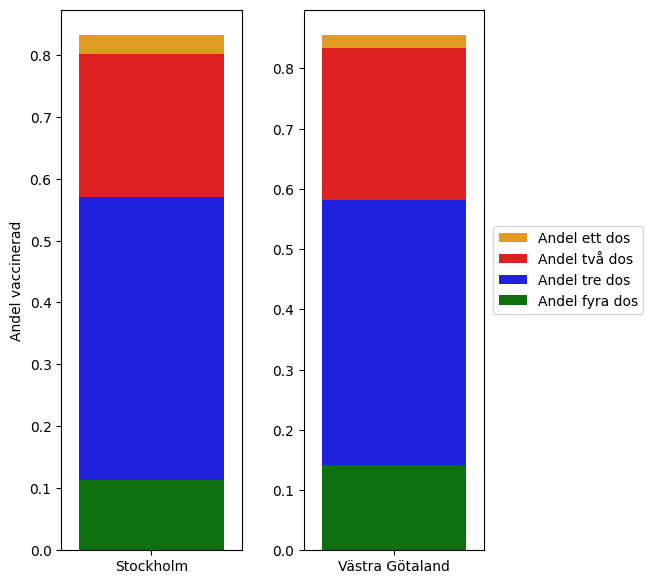

In [37]:
#https://www.statology.org/pandas-select-rows-based-on-column-values/
stockholm_info = län_data.loc[län_data['Län_namn'] == 'Stockholm'].reset_index().drop('index', axis=1)
västra_götaland_info = län_data.loc[län_data['Län_namn'] == 'Västra Götaland'].reset_index().drop('index', axis=1)

fig, axes = plt.subplots(1, 2, figsize=(5,6)) # Set a more convenient size.
plt.tight_layout()

sns.barplot(stockholm_info, x='Län_namn', y = 'Andel ett dos', color='orange' ,ax = axes[0], label = 'Andel ett dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel två dos', color='red'    ,ax = axes[0], label = 'Andel två dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel tre dos', color='blue'   ,ax = axes[0], label = 'Andel tre dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel fyra dos', color='green'   ,ax = axes[0], label = 'Andel fyra dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel ett dos', color='orange' ,ax = axes[1], label = 'Andel ett dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel två dos', color='red'    ,ax = axes[1], label = 'Andel två dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel tre dos', color='blue'   ,ax = axes[1], label = 'Andel tre dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel fyra dos', color='green'   ,ax = axes[1], label = 'Andel fyra dos')
axes[0].set_xlabel('')
axes[0].set_ylabel('Andel vaccinerad')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
# https://www.statology.org/seaborn-legend-outside/
plt.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left', borderaxespad=0); # Add a legend to show labels of each bar.
